<a href="https://colab.research.google.com/github/leehj2586/leehj/blob/main/ESAA_1011_%EA%B9%83%ED%97%88%EB%B8%8C%ED%95%84%EC%82%AC_textmining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEXT MINING for BEGINNER
## DAY 11. 실전 텍스트 분석하기: 단어빈도분석, 연관단어분석

### 1. 단어빈도분석: 문서에서 단어의 출현빈도 계산하기
#### 1.1 샘플 데이터 불러오기

In [16]:
#구글 드라이브
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# 기사본문을 저장할 리스트 생성
article_list = []

# 기사가 저장된 파일은 data 폴더 안에 저장되어 있음
file_path = '/content/drive/MyDrive/ESAA/OB/article_sample.txt'

# 기사가 저장된 파일을 불러옵니다.
f = open(file_path, encoding = "utf-8")
for line in f:
    col = line.strip().split('\t')
    # group = col[0]
    # source = col[1]
    # datetime = col[2]
    # title = col[3]
    # 기사의 본문만 가져와 리스트에 저장
    content = col[4]
    article_list.append(content)
f.close()

print('총 기사 수:', len(article_list))

총 기사 수: 100


In [2]:
print("기사샘플: ")
print(article_list[3][:1000])

기사샘플: 
10년 역사 10대 뉴스로 정리(지디넷코리아=임유경 기자)2008년 9월 리먼 브라더스 파산으로 촉발된 금융위기가 전 세계를 뒤흔들었다. 세계 금융시스템이 붕괴 위기에 놓여 있던 이때, 인터넷 세상 한 켠에선 새로운 금융 시스템이 조용하게 작동을 시작했다. 10년 전 1월 3일 오후 6시 15분. 은행이나 정부의 개입이 필요 없는 개인 간 전자화폐 시스템 비트코인 네트워크의 첫 번째 블록이 탄생한 순간이다.이날 사토시 나카모토라는 가명의 인물은 앞서 공개한 논문을 통해 제시한 아이디어를 약 한달만에 구현하는 데 성공했다. 기념비적인 첫 번째 블록에는 "재무장관, 은행에 두 번째 구제금융 제공 임박”이라는 문구를 새겼다. 이날 영국 일간지 <타임스>의 1면 헤드라인으로, 비트코인 네트워크가 기존 금융 시스템에 대안적인 성격을 띤다는 정체성을 분명하게 드러냈다.이후 비트코인은 굴곡진 10년의 세월을 보냈다. 2011년 초까지 1달러의 가치도 인정 받지 못했다. 비트코인에 대한 관심도 암호학 커뮤니티 내 개발자들이 재미로 채굴(트랜잭션을 블록단위로 묶어 처리하는 작업)하고 비트코인을 받는 수준에 그쳤다. 이후 관심을 늘었지만 투기기 불법적인 요소 결합돼 버블이니 검은 돈이니 하는 오명을 얻기도 했다.2009년 1월 3일 비트코인 첫 번째 블록인 제네시스 블록이 생성됐다.여전비 비트코인은 실험대 위에 있다. 가격이 출렁일 때마다 "비트코인은 죽었다"는 제목의 기사가 쏟아져 나온다. 지난해 언론에서 내린 사망선고는 거의 100번에 이른다. (☞관련링크)분명한 것은 비트코인의 잠재력을 믿는 사람들이 늘어나고 있다는 점이다. 이제 전 세계 모든 주요 기업들이 비트코인 기반 기술인 블록체인의 혁신성에 주목하고 기존 비즈니스에 적용하기 위해 연구에 나섰다.비트코인 맥시멀리스트로 알려진 지미 송은 최근 자신의 블로그에 비트코인이 가진 특성 중 탈중앙성(정부나 은행의 개입이 없는 상태)에 주목해야 한다고 강조하며 "기업가들은 비트코인 내에서 자신의 돈과 노력을 가지고

#### 1.2 기사 문장을 형태소 단위로 분리하기

In [3]:
!pip install konlpy

In [4]:
# 꼬꼬마 형태소 분석기 불러오기
from konlpy.tag import Kkma
kkma = Kkma()

text = '꼬꼬마 형태소 분석기를 불러옵니다.'
print(kkma.pos(text))


[('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('불러오', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [11]:
# 형태소분석 후 기사단위의 형태소 리스트를 저장할 리스트를 생성
tag_sentence_list = []

# 불용어 리스트 정의
stop_list = ['카페', '카페규정']

# 형태소 중 꼭 포함해야하는 형태소 태그를 리스트로 생성
pos_list = ['NNG', 'NNP']

now = 0
for article in article_list:
    now += 1
    print(now, end = '\r')
    sentence_list = kkma.sentences(article)
    tag_sentence = []
    for sentence in sentence_list:
        tag_list = kkma.pos(sentence)
        for word, pos in tag_list:
            if pos in pos_list and word not in stop_list and len(word) > 1:
                tag_sentence.append(word)
    tag_sentence_list.append(tag_sentence)

#### 1.3. 형태소 단위로 출현빈도 카운트 하기

In [12]:
# 단어와 빈도를 쌍으로 저장할 딕셔너리를 생성
word_frequency = {}

for tag_sentence in tag_sentence_list:
    for word in tag_sentence:
        # 단어가 word_frequency의 키(key)값에 존재하는 경우 값(value)만 1을 더하고,
        # 없는 경우에는 1로 초기화한다.
        if word in word_frequency.keys():
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

# word_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬
word_count = []
for word, freq in word_frequency.items():
    word_count.append([word, freq])
word_count.sort(key = lambda elem: elem[1], reverse = True)

# 단어의 빈도 상위 N개를 출력합니다.
for word, freq in word_count[:20]:
    print(word + '\t' + str(freq))

금융	873
금리	797
비트	554
부동산	519
대출	505
은행	384
기준	265
시장	190
화폐	185
자산	174
투자	170
당국	149
암호	148
신탁	133
그림자	133
기자	130
거래	120
신용	116
관련	107
정부	103


#### 1.4. 단어빈도를 활용해 워드클라우드 그리기

In [ ]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [19]:
# 추출한 단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성
noun_string = ''

# 명사를 띄어쓰기 구분자로 붙혀줌
for tag_sentence in tag_sentence_list:
    # wordcloud 패키지는 연속되는 단어를 하나로 인식
    # 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 함
    # random 패키지의 shuffle(LIST)함수는 리스트의 순서를 랜덤으로 섞어줌
    import random
    random.shuffle(tag_sentence)
    for word in tag_sentence:
        noun_string += word + " "

# 마지막에 붙은 띄어쓰기 제거
noun_string = noun_string.strip()

In [21]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 123644 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


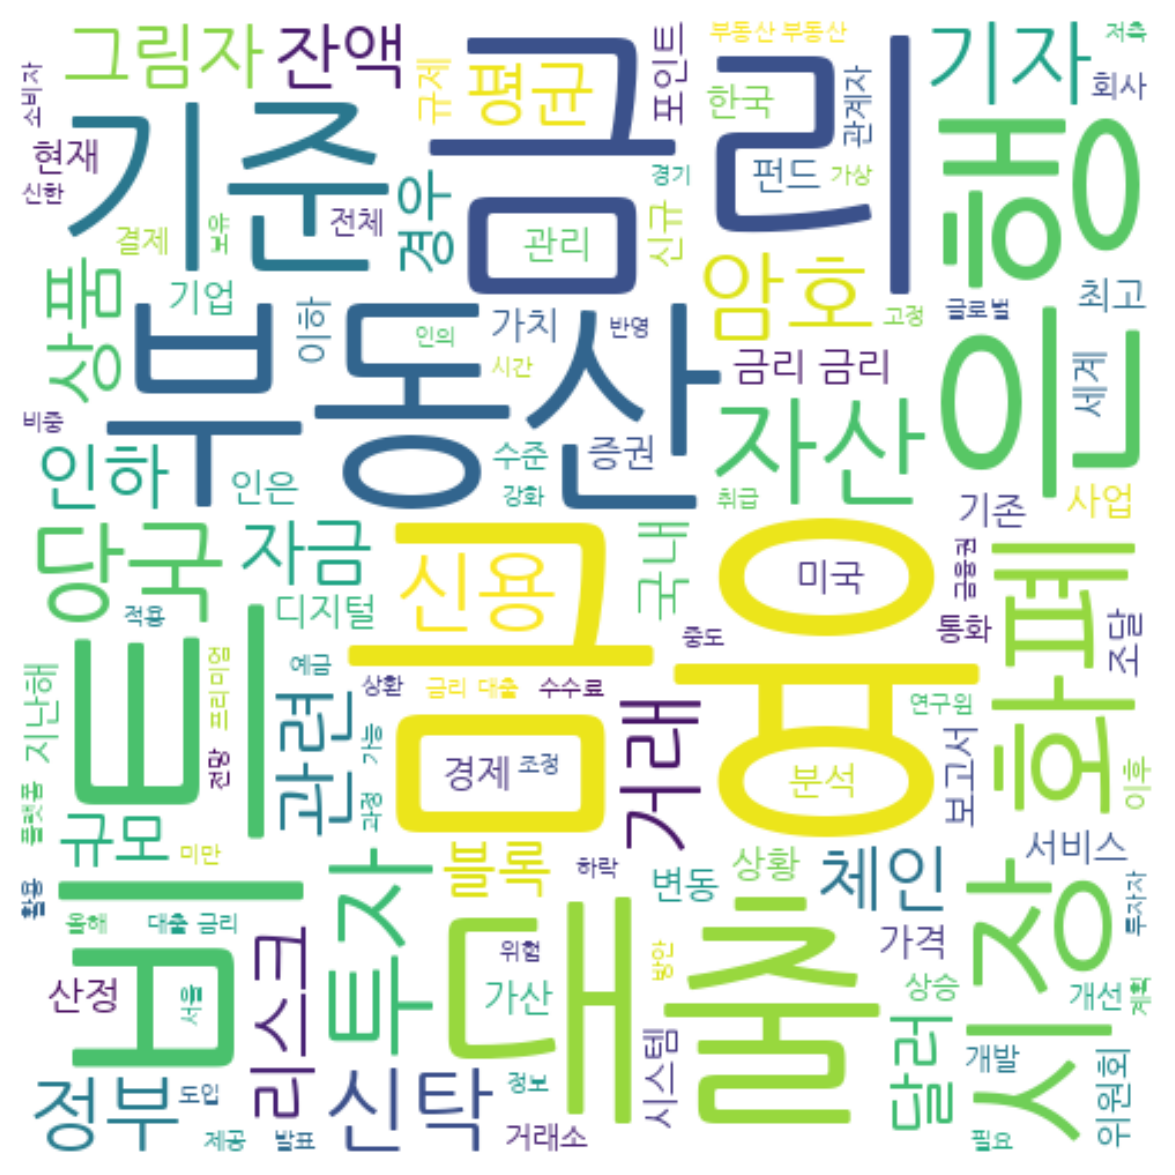

In [22]:
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


### 2. 연관어분석: 문서에서 단어 사이의 동시출현빈도 계산하기
#### 2.3. 단어 기준으로 주변단어 출현빈도 카운트 하기(2.1, 2.2는 1.1, 1.2 과정과 동일)

In [23]:
# 연관어를 알아볼 키워드를 지정
# 키워드는 문서에 반드시 포함된 단어만 지정해야함
keyword = "금리"

# 연관단어와 그 출현빈도를 저장할 딕셔너리를 생성
co_frequency = {}

for tag_sentence in tag_sentence_list:
    if keyword not in tag_sentence:
        continue
    index = tag_sentence.index(keyword)
    # 연관단어의 정의를 keyword 앞, 뒤의 3단어 까지 포함된 단어로 지정
    window = 3
    co_word_list = tag_sentence[index - window : index+window+1]
    for word in co_word_list:
        # 단어가 co_frequency 키(key)값에 존재하는 경우 값(value)만 1 더하고,
        # 없는 경우에는 1로 초기화
        if word in co_frequency.keys():
            co_frequency[word] += 1
        else:
            co_frequency[word] = 1

# co_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬
co_word_list = []
for i, j in co_frequency.items():
    co_word_list.append((i,j))
co_word_list.sort(key = lambda elem: elem[1], reverse = True)

# 연관단어의 빈도 상위 N개 출력
for word, frequency in co_word_list[:10]:
    print(word + '\t' + str(frequency))

금리	32
금융	11
대출	8
가산	6
기준	4
당국	4
시장	3
자금	3
조달	3
최고	3


#### 2.4. 연관단어의 동시출현빈도를 활용해 워드클라우드 그리기

In [24]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [25]:
# 추출한 연관단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성
noun_string = ''

# 명사를 띄어쓰기 구분자로 붙혀줌
noun_list = []
for word, frequency in co_word_list[:10]:
    for i in range(frequency):
        noun_list.append(word)

# wordcloud 패키지는 연속되는 단어를 하나로 인식
# 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 함
# random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줌
import random
random.shuffle(noun_list)

for word in noun_list:
    noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거
noun_string = noun_string.strip()

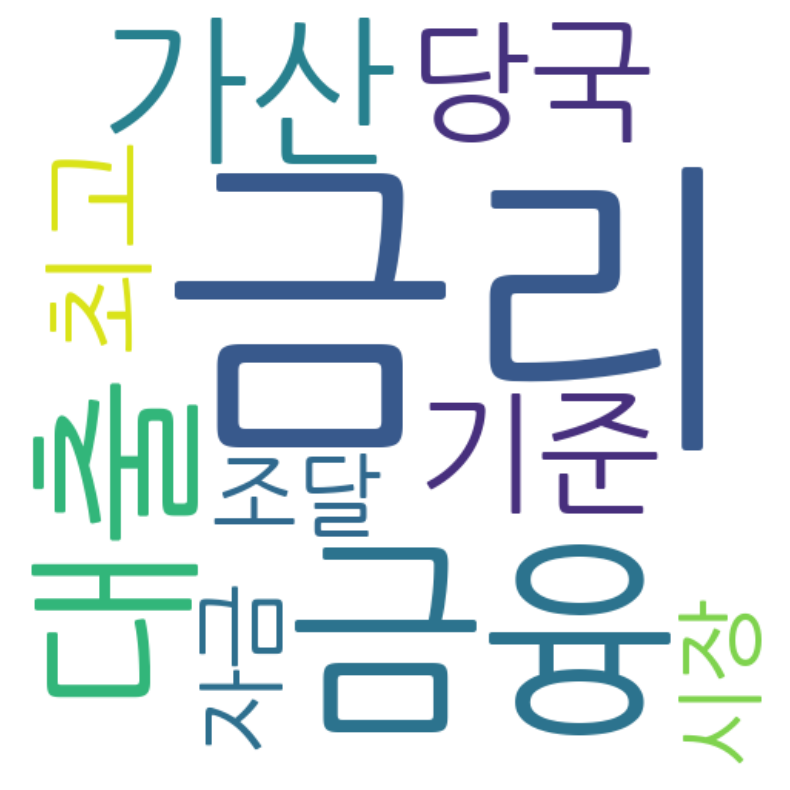

In [27]:
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=20              #최소 글자 크기
max_font_size=200             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()